# HW-final Project (Windy Gridworld)
## Environment Establish

We have made the following features:
1. The wind parameters can be negative which indicates another side wind;
2. The wind parameters can be randomly selected from $\{-1,0,1\}$ each time;
3. You can easily design your own map according to the interactive window (including `START`, `GOAL` and `WALLS`);
4. Blocks (walls) can be set and we have considered the deviation caused by the wind to make the move rational.

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import pygame as pg
import seaborn as sns
sns.set()

class enviroment_gen():
    def __init__(self, height : int, width : int, wind : list, is_random: bool = False):
        """
        Generate a simulating environment.

        :param height: Maze Height;
        :param width: Maze WIDTH;
        :param wind: Winds list along the columns, hence its length should be WIDTH;
        :param is_random: whether the wind is random;
        """
        self.HEIGHT = height
        self.WIDTH = width
        self.WIND = wind
        self.is_random = is_random
        
        # must set valid wind list
        if len(self.WIND) != self.WIDTH:
            self.WIND = [0] * self.WIDTH # reset it to zero
            print("Notice: Given wrong wind list, reset to zero!")
        
        # get the environment matrix and display winodw
        self.__maze = self.visualize()

        # possible actions
        self.ACTION_UP = 0
        self.ACTION_DOWN = 1
        self.ACTION_LEFT = 2
        self.ACTION_RIGHT = 3

    def step(self, state : list, action : int):
        """
        Generate next state based on current state and action.
        Notice that the wind affect should be based on current state, not next-state.
        Tips: we make sure that the agent will not pass-through the wall by `step(state,action)`.

        :param state: current state;
        :param action: action choosen;
        :return: next state (a (2,1) list);
        """
        i, j = state
        # notice: the left corner is [0,0] and the right corner is [HEIGHT - 1, WIDTH - 1]
        if self.__maze[i,j] == -10: # you can't get to a wall state
            print("Something went wrong!")
            print(i,j)
            assert False
        
        if self.is_random:
            self.WIND[j] = np.random.choice(2,1) -1 # randomly choose from {-1,0,1}
        if action == self.ACTION_UP:
            end = min(max(i - 1 - self.WIND[j], 0), self.HEIGHT - 1)
            if end <= i:
                if np.any(self.__maze[end:i + 1, j] == -10): # blocked by walls
                    end = end + np.where(self.__maze[end:i + 1, j] == -10)[0][-1] # 从下往上走, 取 -1 [相对位置]
                    return [min(end + 1, i), j]
                else:
                    return [end,j]
            else:
                if np.any(self.__maze[i:end + 1, j] == -10): # blocked by walls
                    end = i + np.where(self.__maze[i:end + 1, j] == -10)[0][0] # 从上往下走, 取 0 [相对位置]
                    return [max(end - 1, i), j]
                else:
                    return [end,j]
        
        elif action == self.ACTION_DOWN:
            end = max(min(i + 1 - self.WIND[j], self.HEIGHT - 1), 0)
            if end >= i:
                if np.any(self.__maze[i:end + 1, j] == -10): # blocked by walls
                    end = i + np.where(self.__maze[i:end + 1, j] == -10)[0][0] # 从上往下走, 取 0
                    return [max(end - 1, i), j]
                else:
                    return [end, j]
            else:
                if np.any(self.__maze[end:i + 1, j] == -10): # blocked by walls
                    end = end + np.where(self.__maze[end:i + 1, j] == -10)[0][-1] # 从下往上走, 取 -1
                    return [min(end + 1, i), j]
                else:
                    return [end, j]
        
        elif action == self.ACTION_LEFT:
            if self.__maze[i, max(j - 1, 0)] == -10:
                return [i, j]
            end = min(max(i - self.WIND[j], 0), self.HEIGHT - 1)
            if end <= i:
                if np.any(self.__maze[end:i + 1, max(j - 1, 0)] == -10): # blocked by walls
                    end = end + np.where(self.__maze[end:i + 1, max(j - 1, 0)] == -10)[0][-1] # 从下往上走, 取 -1
                    return [min(end + 1, i), max(j - 1, 0)]
                else:
                    return [end, max(j - 1, 0)]
            else:
                if np.any(self.__maze[i:end + 1, max(j - 1, 0)] == -10): # blocked by walls
                    end = i + np.where(self.__maze[i:end + 1, max(j - 1, 0)] == -10)[0][0] # 从上往下走, 取 0
                    return [max(end - 1, i), max(j - 1, 0)]
                else:
                    return [end, max(j - 1, 0)]
        
        elif action == self.ACTION_RIGHT:
            if self.__maze[i, min(j + 1, self.WIDTH - 1)] == -10:
                return [i, j]
            end = min(max(i - self.WIND[j], 0), self.HEIGHT - 1)
            if end <= i:
                if np.any(self.__maze[end:i + 1, min(j + 1, self.WIDTH - 1)] == -10): # blocked by walls
                    end = end + np.where(self.__maze[end:i + 1, min(j + 1, self.WIDTH - 1)] == -10)[0][-1] # 从下往上走, 取 -1
                    return [min(end + 1, i), min(j + 1, self.WIDTH - 1)]
                else:
                    return [end, min(j + 1, self.WIDTH - 1)]
            else:
                if np.any(self.__maze[i:end + 1, min(j + 1, self.WIDTH - 1)] == -10): # blocked by walls
                    end = i + np.where(self.__maze[i:end + 1, min(j + 1, self.WIDTH - 1)] == -10)[0][0] # 从上往下走, 取 0
                    return [max(end - 1, i), min(j + 1, self.WIDTH - 1)]
                else:
                    return [end, min(j + 1, self.WIDTH - 1)]
        else:
            assert False
    
    def visualize(self):
        """
        Generate the MAZE. 使用说明:
        1. 按下鼠标左键设置起点;
        2. 按下鼠标右键设置终点;
        3. 鼠标滚轮上滑设置路径;
        4. 鼠标滚轮下滑设置墙(障碍物);

        :return: Matrix form of the `maze` environment;
        """
        # set width and height of UI window
        window_height = self.HEIGHT*18
        window_width = self.WIDTH*18

        # initialize PyGame
        pg.init()

        # create PyGame window
        win = pg.display.set_mode((window_width,window_height))
        pg.display.set_caption("RL for Windy Maze")

        # set drawable dimensions of each cell
        width_ = 15
        margin_ = 3

        # set drawable objects
        maze = [[-1 for _ in range(0, self.WIDTH)]
                for _ in range(0, self.HEIGHT)]
        grid = np.array(maze)

        # initialize loop for customizing maze grid
        setup = True
        self.update(grid, win, width_, margin_)
        while setup:
            for event in pg.event.get():
                if event.type == pg.QUIT:
                    setup = False
                    pg.display.quit()
                    pg.quit()
                
                # take user input for drawing game environment
                elif event.type == pg.MOUSEBUTTONDOWN:
                    pos = pg.mouse.get_pos()
                    column = pos[0] // (width_ + margin_)
                    row = pos[1] // (width_ + margin_)
                    if event.button == 1: # 按下鼠标左键设置起点
                        grid[row, column] = 0
                    if event.button == 3: # 按下鼠标右键设置终点
                        grid[row, column] = 10
                    if event.button == 4: # 鼠标滚轮上滑设置路径
                        grid[row, column] = -1
                    if event.button == 5: # 鼠标滚轮下滑设置墙(障碍物)
                        grid[row, column] = -10
                    self.update(grid, win, width_, margin_)
        
        assert len(np.where(grid == 0)[0]) == 1
        assert len(np.where(grid == 10)[0]) == 1
        return grid
    
    def update(self, grid, win, width_ : int, margin_ : int):
        """
        Visualize current MAZE based on `grid` and export it to `win`.

        width_ and margin_ should be constant.
        """
        for row in range(len(grid)):
            for column in range(len(grid[row])):
                # draw cells occupied by walls
                if grid[row, column] == -10:
                    pg.draw.rect(win, pg.Color("BLACK"), ((width_ + margin_) * column, (width_ + margin_) * row, width_, width_))
                # draw empty cells
                if grid[row, column] == -1:
                    pg.draw.rect(win, pg.Color("White"), ((width_ + margin_) * column, (width_ + margin_) * row, width_, width_))
                # draw cells occupied by the end goal
                if grid[row, column] == 10:
                    pg.draw.rect(win, pg.Color("Green"), ((width_ + margin_) * column, (width_ + margin_) * row, width_, width_))
                # draw cells occupied by the path finder
                if grid[row, column] == 2:
                    pg.draw.rect(win, pg.Color("Blue"), ((width_ + margin_) * column, (width_ + margin_) * row, width_, width_))
                # Draw cells occupied by the starter
                if grid[row, column] == 0:
                    pg.draw.rect(win, pg.Color("RED"), ((width_ + margin_) * column, (width_ + margin_) * row, width_, width_))
        pg.display.update()

    @property
    def maze(self):
        # forbid any outer to change maze
        return self.__maze

# world height
HEIGHT = 20

# world width
WIDTH = 20

# wind strength for each column
WIND = np.random.choice(4,WIDTH) -2 # 当风的强度小于0时候表示反向风
#WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0] # most trival case
print(f"Wind strength for each column is:\n{[str(w) for w in WIND]}")

# 环境编号: 路径 = -1 / 墙体 = -10 / 起点 = 0 / 终点 = 10 / 预留可视化 = 2
world = enviroment_gen(HEIGHT,WIDTH,WIND,is_random = True)

Wind strength for each column is:
['-2', '1', '1', '-1', '-1', '-1', '-1', '-2', '-2', '1', '0', '0', '1', '-2', '-2', '-2', '-1', '0', '-1', '-2']


## Learning Strategies

1. We have designed 4 possible learning strategies;
2. The training steps can be visualized based on former self-designed map.
3. Analysis plots are provided and with optimal actions stored accordingly.

Some bugs encountered on MAC:
* The `pygame` windows can't exit as expected. 

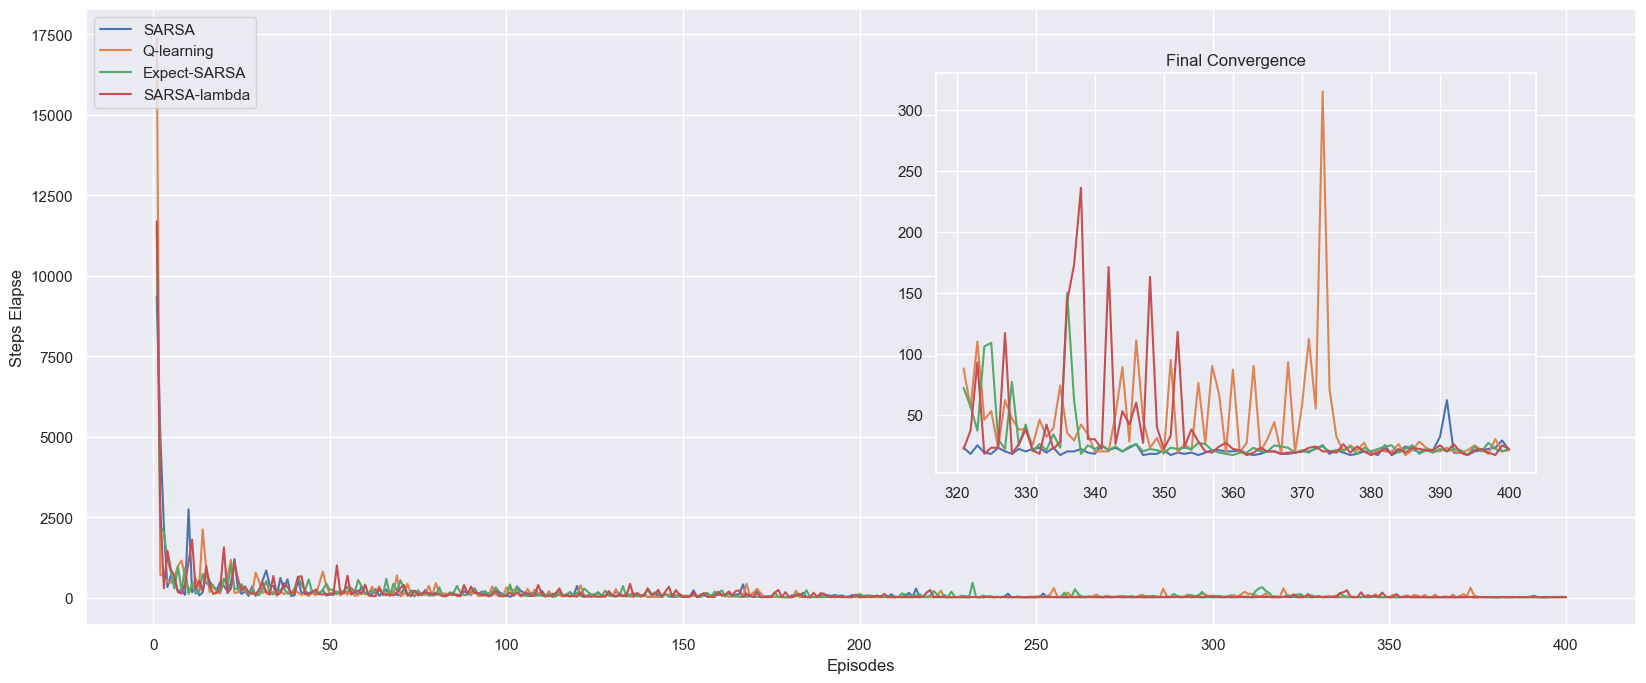

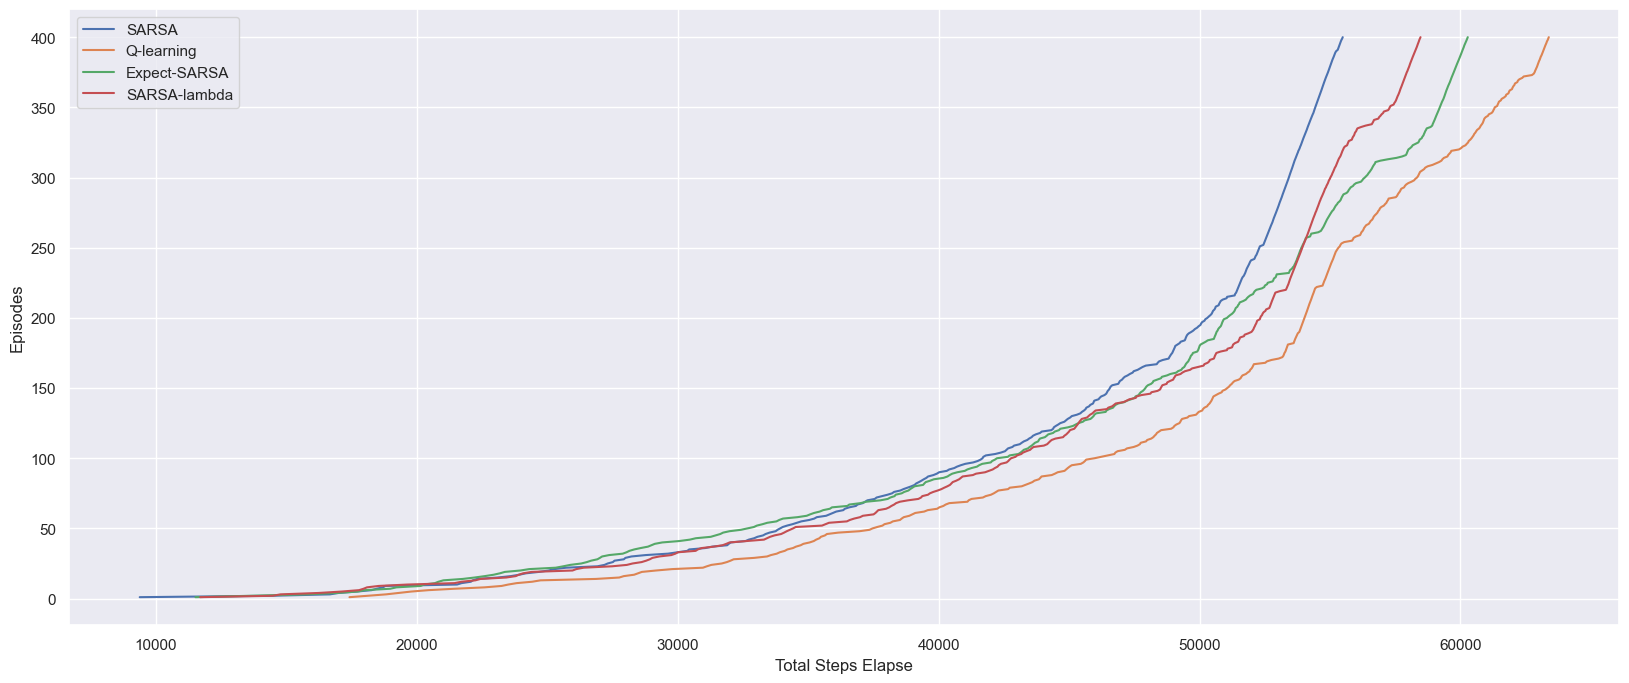

THe optimal last policy is:
['L', 'R', 'U', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'D', 'D', 'U', 'U', 'U', 'U']
['R', 'D', 'U', 'R', 'U', 'U', 'L', 'U', 'R', 'U', 'R', 'R', 'U', 'R', 'R', 'R', 'R', 'L', 'U', 'U']
['R', 'U', 'R', 'U', 'U', 'L', 'R', 'L', 'U', 'D', 'U', 'U', 'U', 'R', 'R', 'U', 'U', 'L', 'U', 'R']
['U', 'U', 'U', 'U', 'R', 'R', 'U', 'U', 'U', 'R', 'R', 'R', 'R', 'R', 'R', 'U', 'U', 'R', 'R', 'L']
['U', 'U', 'R', 'U', 'D', 'U', 'U', 'R', 'D', 'R', 'R', 'U', 'R', 'R', 'R', 'D', 'U', 'L', 'R', 'U']
['U', 'U', 'R', 'L', 'U', 'D', 'U', 'D', 'U', 'U', 'U', 'R', 'U', 'R', 'U', 'R', 'D', 'R', 'U', 'R']
['U', 'R', 'U', 'U', 'D', 'R', 'D', 'U', 'R', 'R', 'R', 'R', 'R', 'R', 'U', 'R', 'R', 'D', 'L', 'L']
['U', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'U', 'U', 'U', 'R', 'R', 'G', 'L', 'L']
['D', 'U', 'U', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'U', 'U', 'U']
['D', 'U', 'L', 'U', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X

In [8]:
# initialize PyGame
pg.init()
# create PyGame window (18 is the size of cells and hence constant)
WIN = pg.display.set_mode((world.WIDTH*18,world.HEIGHT*18))
pg.display.set_caption("RL for Windy Maze")

MAZE = world.maze # MAZE must not be changed
MAZE_show = MAZE.copy() # copy for visualzing our path
world.update(MAZE, WIN, 15, 3)
START = [np.where(MAZE == 0)[0][0], np.where(MAZE == 0)[1][0]] # only one START should be set
GOAL = [np.where(MAZE == 10)[0][0], np.where(MAZE == 10)[1][0]] # only one GOAL should be set
WALLS = [[np.where(MAZE == -10)[0][i],np.where(MAZE == -10)[1][i]] for i in range(len(np.where(MAZE == -10)[0])) ]
ACTIONS = [world.ACTION_UP, world.ACTION_DOWN, world.ACTION_LEFT, world.ACTION_RIGHT]

# probability for exploration (epsilon greedy)
EPSILON = 0.1
# step-size
ALPHA = 0.5
# reward for each step
REWARD = -1.0
# parameter for SARSA-lambda
LAMBDA = 0.05

def choose_action(state: list, q_value : np.ndarray, epsilon : float = EPSILON, action_set : list = ACTIONS):
    """
    choose an action based on epsilon-greedy algorithm

    :param state: current state;
    :param q_value: reference Q-table for updating;
    :param epsilon: probability for exploration;
    :param action_set: actions can be choosen from;
    
    :return: action to be choosed.
    """
    if np.random.binomial(1, epsilon) == 1:
        return np.random.choice(action_set)
    else:
        values_ = q_value[state[0], state[1], :]
        return np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

def one_episode(q_value : np.ndarray, method : str = "SARSA", 
                epsilon : float = EPSILON, alpha : float = ALPHA, lambda_: float = LAMBDA,
                reward : float = REWARD, action_set : list = ACTIONS, start : list = START, goal : list = GOAL):
    """
    Play one episode game based on q_value.
    Notice this function will change q_value!

    :param q_value: current Q-table;
    :param method: method to be used;
    :param epsilon: probability for exploration;
    :param alpha: alpha ratio for updating rule, also known as step-size;
    :param lambda_: parameter for SARSA-lambda algorithm;
    :param reward: reward for each step, assumed fixed;
    :param action_set: actions can be choosen from;
    :param start: state for start;
    :param goal: state for goal;
    
    :return: how many times it takes from START to GOAL.
    :return: the action path.
    """
    # declare global settings for visualize
    global MAZE_show, MAZE, WIN, world
    assert method in ["SARSA", "Q-learning", "Expect-SARSA","SARSA-lambda"]

    # initialize state
    state = start
    state_path = []

    action = choose_action(state, q_value, epsilon, action_set)
    action_path = []

    if method == "SARSA-lambda":
        trace = np.zeros((world.HEIGHT, world.WIDTH, 4))  # Eligibility Trace Initialize

    # keep going until get to the goal state
    while state != goal:
        if method == "SARSA":
            next_state = world.step(state, action)
            #print(state, action, next_state)
            next_action = choose_action(next_state, q_value, epsilon, action_set)
            target = q_value[next_state[0], next_state[1], next_action]

        elif method == "Q-learning":
            action = choose_action(state, q_value, epsilon, action_set) # action based on current state
            next_state = world.step(state, action)
            target = np.max(q_value[next_state[0], next_state[1], :])

        elif method == "Expect-SARSA":
            next_state = world.step(state, action)
            next_action = choose_action(next_state, q_value, epsilon, action_set)
            # calculate the expected value of new state
            target = 0.
            q_next = q_value[next_state[0], next_state[1], :]
            best_actions = np.argwhere(q_next == np.max(q_next))
            for action_ in action_set:
                if action_ in best_actions:
                    target += ((1.0 - epsilon) / len(best_actions) + epsilon / len(action_set)) * q_value[next_state[0], next_state[1], action_]
                else:
                    target += epsilon / len(action_set) * q_value[next_state[0], next_state[1], action_]
            
        elif method == "SARSA-lambda":
            next_state = world.step(state, action)
            next_action = choose_action(next_state, q_value, epsilon, action_set)
            target = q_value[next_state[0], next_state[1], next_action]

            delta = reward + target  - q_value[state[0], state[1], action]
            # Update Eligibility Trace
            trace[state[0], state[1], action] += 1

            # Update Rule (Eligibility Trace Form)
            # Notice that the REWARD is fixed (= -1) !
            q_value += alpha * delta * trace
            trace *= lambda_
        
        # Update Rule (TD form)
        # Notice that the REWARD is fixed (= -1) !
        # Notice that the Eligibility Trace is updated in another way!
        if method != "SARSA-lambda":
            q_value[state[0], state[1], action] += \
                alpha * (reward + target  - q_value[state[0], state[1], action])
        
        # store actions and states
        state = next_state
        state_path.append(next_state)
        action_path.append(action)
        if method != "Q-learning":
            action = next_action

    # color the cells to illustrate path (visualize)
    MAZE_show = MAZE.copy()
    for i in state_path[:-1]:
        MAZE_show[i[0], i[1]] = 2
    world.update(MAZE_show, WIN, 15, 3)

    return len(action_path), action_path

def Main(EPISODE_NUM : int = 400):
    """
    Main function.

    :param EPISODE_NUM: Run the MAZE learning for EPISODE_NUM times;
    :return: the action path of each given metho.
    """
    global MAZE_show, MAZE, WIN, world
    global START, GOAL, WALLS, ACTIONS
    global EPSILON, ALPHA, REWARD

    # setup Q-tables and total episode num
    HEIGHT, WIDTH = world.HEIGHT, world.WIDTH
    Q_VALUES_1 = np.zeros((HEIGHT, WIDTH, 4))
    Q_VALUES_2 = np.zeros((HEIGHT, WIDTH, 4))
    Q_VALUES_3 = np.zeros((HEIGHT, WIDTH, 4))
    Q_VALUES_4 = np.zeros((HEIGHT, WIDTH, 4))

    sarsa_elapse = []
    qlearning_elapse = []
    Esarsa_elapse = []
    sarsaLambda_elapse = []
    result_1, result_2, result_3, result_4 = None, None, None, None
    episode_index = 0

    while episode_index < EPISODE_NUM:
        # let the EPSILON vary when the time elapse
        var_EPSILON = EPSILON/(episode_index + 1)
        elapse, result_1 = one_episode(Q_VALUES_1, method = "SARSA", epsilon = var_EPSILON)
        sarsa_elapse.append(elapse)
        elapse, result_2 = one_episode(Q_VALUES_2, method = "Q-learning", epsilon = var_EPSILON)
        qlearning_elapse.append(elapse)
        elapse, result_3 = one_episode(Q_VALUES_3, method = "Expect-SARSA", epsilon = var_EPSILON)
        Esarsa_elapse.append(elapse)
        elapse, result_4 = one_episode(Q_VALUES_4, method = "SARSA-lambda", epsilon = var_EPSILON)
        sarsaLambda_elapse.append(elapse)
        episode_index += 1
    
    #pg.display.quit()
    #pg.quit()
    
    plt.figure(figsize = (20,8))
    treshold = int(0.2 * EPISODE_NUM)
    plt.plot(np.arange(1, EPISODE_NUM + 1),sarsa_elapse, label = "SARSA")
    plt.plot(np.arange(1, EPISODE_NUM + 1),qlearning_elapse, label = "Q-learning")
    plt.plot(np.arange(1, EPISODE_NUM + 1),Esarsa_elapse, label = "Expect-SARSA")
    plt.plot(np.arange(1, EPISODE_NUM + 1),sarsaLambda_elapse, label = "SARSA-lambda")

    plt.xlabel('Episodes')
    plt.ylabel('Steps Elapse')
    plt.legend(loc = 2)

    axes = plt.axes([0.55, 0.3, 0.3, 0.5])
    plt.title('Final Convergence')
    plt.plot(np.arange(1, EPISODE_NUM + 1)[-treshold:], sarsa_elapse[-treshold:])
    plt.plot(np.arange(1, EPISODE_NUM + 1)[-treshold:], qlearning_elapse[-treshold:])
    plt.plot(np.arange(1, EPISODE_NUM + 1)[-treshold:], Esarsa_elapse[-treshold:])
    plt.plot(np.arange(1, EPISODE_NUM + 1)[-treshold:], sarsaLambda_elapse[-treshold:])
    #plt.setp(axes)
    plt.show()
    
    plt.figure(figsize = (20,8))
    sarsa_elapse = np.add.accumulate(sarsa_elapse)
    qlearning_elapse = np.add.accumulate(qlearning_elapse)
    Esarsa_elapse = np.add.accumulate(Esarsa_elapse)
    sarsaLambda_elapse = np.add.accumulate(sarsaLambda_elapse)
    plt.plot(sarsa_elapse, np.arange(1, EPISODE_NUM + 1),label = "SARSA")
    plt.plot(qlearning_elapse, np.arange(1, EPISODE_NUM + 1), label = "Q-learning")
    plt.plot(Esarsa_elapse, np.arange(1, EPISODE_NUM + 1), label = "Expect-SARSA")
    plt.plot(sarsaLambda_elapse, np.arange(1, EPISODE_NUM + 1), label = "SARSA-lambda")

    plt.xlabel('Total Steps Elapse')
    plt.ylabel('Episodes')
    plt.legend()
    plt.show()

    # display the optimal policy
    fianl_policy = []
    for i in range(0, HEIGHT):
        fianl_policy.append([])
        for j in range(0, WIDTH):
            if [i, j] == GOAL:
                fianl_policy[-1].append('G')
                continue
            elif [i,j] in WALLS:
                fianl_policy[-1].append('X')
                continue
            
            best_action = np.argmax(Q_VALUES_4[i, j, :]) # show the best policy for SARSA method
            if best_action == world.ACTION_UP:
                fianl_policy[-1].append('U')
            elif best_action == world.ACTION_DOWN:
                fianl_policy[-1].append('D')
            elif best_action == world.ACTION_LEFT:
                fianl_policy[-1].append('L')
            elif best_action == world.ACTION_RIGHT:
                fianl_policy[-1].append('R')
    print("THe optimal last policy is:")
    for row in fianl_policy:
        print(row)
    return result_1,result_2, result_3, result_4

result_1,result_2, result_3, result_4 = Main(EPISODE_NUM = 400)

* Optimal Actions

In [9]:
def explain(x : list):
    ret = []
    for i in x:
        if i == 0:
            ret.append("Up")
        elif i == 1:
            ret.append("Down")    
        elif i == 2:
            ret.append("Left")
        elif i == 3:
            ret.append("Right")
        else:
            assert False
    return ret

print(f"Wind strength for each column is:\n{[str(w) for w in WIND]}")
for result in [result_1, result_2, result_3, result_4]:
    if result is not None:
        print(f"The Action path for the Algorithm is :\n{[str(w) for w in explain(result)]}")

Wind strength for each column is:
['-1', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '-1', '-1', '-1', '0', '-1', '0', '-1', '-1']
The Action path for the Algorithm is :
['Right', 'Right', 'Up', 'Up', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Up', 'Up', 'Right', 'Right', 'Right', 'Up']
The Action path for the Algorithm is :
['Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Up', 'Right', 'Up', 'Up', 'Up', 'Up']
The Action path for the Algorithm is :
['Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up']
The Action path for the Algorithm is :
['Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Up', 'Up', 'Up', 'Up', 

: 